In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_athlete = pd.read_csv("D:/360MoveData/Users/YL/Desktop/吴恩达/2025mcm/2025_Problem_C_Data/2025_Problem_C_Data/summerOly_athletes.csv")
df_host = pd.read_csv("D:/360MoveData/Users/YL/Desktop/吴恩达/2025mcm/2025_Problem_C_Data/2025_Problem_C_Data/summerOly_hosts.csv")
df_medal = pd.read_csv("D:/360MoveData/Users/YL/Desktop/吴恩达/2025mcm/2025_Problem_C_Data/2025_Problem_C_Data/summerOly_medal_counts.csv")
df_programs = pd.read_csv("D:/360MoveData/Users/YL/Desktop/吴恩达/2025mcm/2025_Problem_C_Data/2025_Problem_C_Data/summerOly_programs.csv",encoding='latin1')

In [3]:
df_athlete.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [4]:
df_host.head()

,Year,Host
0,1896,"Athens, Greece"
1,1900,"Paris, France"
2,1904,"St. Louis, United States"
3,1908,"London, United Kingdom"
4,1912,"Stockholm, Sweden"


In [5]:
df_medal['NOC'].unique()

array(['United States', 'Greece', 'Germany', 'France', 'Great Britain',
       'Hungary', 'Austria', 'Australia', 'Denmark', 'Switzerland',
       'Mixed team', 'Belgium', 'Italy', 'Cuba', 'Canada', 'Spain',
       'Luxembourg', 'Norway', 'Netherlands', 'India', 'Bohemia',
       'Sweden', 'Australasia', 'Russian Empire', 'Finland',
       'South Africa', 'Estonia', 'Brazil', 'Japan', 'Czechoslovakia',
       'New Zealand', 'Yugoslavia', 'Argentina', 'Uruguay', 'Poland',
       'Haiti', 'Portugal', 'Romania', 'Egypt', 'Ireland', 'Chile',
       'Philippines', 'United States\xa0', 'Italy\xa0', 'France\xa0',
       'Sweden\xa0', 'Japan\xa0', 'Hungary\xa0', 'Germany\xa0',
       'Finland\xa0', 'Great Britain\xa0', 'Poland\xa0', 'Australia\xa0',
       'Argentina\xa0', 'Canada\xa0', 'Netherlands\xa0',
       'South Africa\xa0', 'Ireland\xa0', 'Czechoslovakia\xa0',
       'Austria\xa0', 'India\xa0', 'Denmark\xa0', 'Mexico\xa0',
       'Latvia\xa0', 'New Zealand\xa0', 'Switzerland\xa0',
    

In [6]:
#处理一下俄罗斯奥委会参赛名称
df_medal.loc[df_medal['NOC'] == 'ROC','NOC'] = 'Russia'

In [7]:
#对奖牌数据集建立一个与三字符国家名对应的映射，方便后续与运动员数据集相对应
# 定义国家名称和对应的三字符代码数组
country_names = ['United States', 'Russia', 'China', 'Australia', 'Germany',
                 'France', 'Italy', 'Netherlands', 'Cuba', 'Great Britain',
                 'Romania', 'South Korea', 'Hungary', 'Poland', 'Japan', 'Bulgaria',
                 'Greece', 'Sweden', 'Norway', 'Ethiopia', 'Ukraine', 'Kazakhstan',
                 'Belarus', 'Canada', 'Spain', 'Turkey', 'Iran', 'Czech Republic',
                 'Kenya', 'Denmark', 'Finland', 'Austria', 'Lithuania',
                 'Azerbaijan', 'Bahamas', 'Slovenia', 'Switzerland', 'Indonesia',
                 'Slovakia', 'Mexico', 'Nigeria', 'Algeria', 'Uzbekistan',
                 'FR Yugoslavia', 'Latvia', 'New Zealand', 'Estonia', 'Thailand',
                 'Croatia', 'Cameroon', 'Colombia', 'Mozambique', 'Brazil',
                 'Jamaica', 'Belgium', 'South Africa', 'Argentina',
                 'Chinese Taipei', 'Morocco', 'North Korea', 'Moldova',
                 'Saudi Arabia', 'Trinidad and Tobago', 'Ireland', 'Sri Lanka',
                 'Uruguay', 'Vietnam', 'Georgia', 'Costa Rica', 'Portugal',
                 'Armenia', 'Barbados', 'Chile', 'Iceland', 'India', 'Israel',
                 'Kuwait', 'Kyrgyzstan', 'Macedonia', 'Qatar', 'Egypt', 'Zimbabwe',
                 'Dominican Republic', 'United Arab Emirates',
                 'Serbia and Montenegro', 'Hong Kong', 'Paraguay', 'Venezuela',
                 'Eritrea', 'Mongolia', 'Syria', 'Panama', 'Tunisia', 'Serbia',
                 'Tajikistan', 'Ecuador', 'Malaysia', 'Samoa', 'Singapore', 'Sudan',
                 'Afghanistan', 'Mauritius', 'Togo', 'Bahrain', 'Grenada', 'Uganda',
                 'Puerto Rico', 'Botswana', 'Cyprus', 'Gabon', 'Guatemala',
                 'Montenegro', 'Independent Olympic Athletes', 'Ivory Coast',
                 'Fiji', 'Jordan', 'Kosovo', 'Burundi', 'Niger', 'Philippines',
                 'Bermuda', 'San Marino', 'Namibia', 'North Macedonia',
                 'Turkmenistan', 'Burkina Faso', 'Ghana', 'Saint Lucia', 'Dominica',
                 'Pakistan', 'Albania', 'Cabo Verde', 'Peru',
                 'Refugee Olympic Team', 'Zambia']

country_codes = ['USA', 'RUS', 'CHN', 'AUS', 'GER',
                  'FRA', 'ITA', 'NED', 'CUB', 'GBR',
                  'ROU', 'KOR', 'HUN', 'POL', 'JPN', 'BUL',
                  'GRE', 'SWE', 'NOR', 'ETH', 'UKR', 'KAZ',
                  'BLR', 'CAN', 'ESP', 'TUR', 'IRN', 'CZE',
                  'KEN', 'DEN', 'FIN', 'AUT', 'LTU',
                  'AZE', 'BHS', 'SLO', 'SUI', 'IDN',
                  'SVK', 'MEX', 'NGA', 'ALG', 'UZB',
                  'YUG', 'LVA', 'NZL', 'EST', 'THA',
                  'CRO', 'CMR', 'COL', 'MOZ', 'BRA',
                  'JAM', 'BEL', 'RSA', 'ARG',
                  'TPE', 'MAR', 'PRK', 'MDA',
                  'KSA', 'TTO', 'IRL', 'SRI',
                  'URU', 'VNM', 'GEO', 'CRC', 'POR',
                  'ARM', 'BRB', 'CHL', 'ISL', 'IND', 'ISR',
                  'KWT', 'KGZ', 'MKD', 'QAT', 'EGY', 'ZIM',
                  'DOM', 'UAE',
                  'SRB', 'HKG', 'PAR', 'VEN',
                  'ERI', 'MGL', 'SYR', 'PAN', 'TUN', 'SRB',
                  'TJK', 'ECU', 'MAS', 'SAM', 'SGP', 'SDN',
                  'AFG', 'MRI', 'TGO', 'BRN', 'GRN', 'UGA',
                  'PUR', 'BWA', 'CYP', 'GAB', 'GTM',
                  'MNE', 'IOC', 'CIV',
                  'FJI', 'JOR', 'KOS', 'BDI', 'NER', 'PHI',
                  'BMU', 'SMR', 'NAM', 'MKD',
                  'TKM', 'BFA', 'GHA', 'LCA', 'DMA',
                  'PAK', 'ALB', 'CPV', 'PER',
                  'ROT', 'ZMB']

# 创建映射字典
mapping_dict = dict(zip(country_names, country_codes))

# 使用映射字典创建新的DataFrame列
df_medal['country_code'] = df_medal['NOC'].map(mapping_dict)

In [8]:
df_medal.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year,country_code
0,1,United States,11,7,2,20,1896,USA
1,2,Greece,10,18,19,47,1896,GRE
2,3,Germany,6,5,2,13,1896,GER
3,4,France,5,4,2,11,1896,FRA
4,5,Great Britain,2,3,2,7,1896,GBR


In [9]:
df_programs.head()

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [10]:
# First question: medals prediction model
#我们这里假设只考虑2000年以来参加过奥运会的国家(NOC)
df_athlete_20 = df_athlete[df_athlete['Year'].isin([2000, 2004, 2008, 2012, 2016, 2020, 2024])]
countries = df_athlete_20.loc[:, 'NOC'].unique()
countries

array(['CHN', 'FIN', 'NOR', 'ROU', 'NED', 'FRA', 'MAR', 'EST', 'ESP',
       'EGY', 'ITA', 'AZE', 'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR',
       'MEX', 'USA', 'NCA', 'ALG', 'BRN', 'IRQ', 'QAT', 'PAK', 'IRI',
       'CAN', 'IRL', 'AUS', 'RSA', 'ERI', 'SUD', 'BEL', 'PLE', 'KAZ',
       'BRU', 'KUW', 'MAS', 'INA', 'UZB', 'UAE', 'KGZ', 'TJK', 'JPN',
       'GER', 'ETH', 'TUR', 'SRI', 'ARM', 'CIV', 'KEN', 'NGR', 'BRA',
       'SYR', 'MLI', 'CHI', 'SUI', 'SWE', 'GUY', 'GEO', 'POR', 'ANG',
       'COL', 'DJI', 'BAN', 'JOR', 'LBA', 'SOM', 'KSA', 'VEN', 'IND',
       'GBR', 'GHA', 'UGA', 'TUN', 'SLO', 'HON', 'ESA', 'TKM', 'MRI',
       'POL', 'NIG', 'SKN', 'NZL', 'LBR', 'SUR', 'NEP', 'MGL', 'PLW',
       'LTU', 'NAM', 'UKR', 'ASA', 'PUR', 'SAM', 'RWA', 'CRO', 'DMA',
       'TOG', 'DEN', 'MLT', 'AUT', 'SEY', 'DOM', 'BIZ', 'PAR', 'URU',
       'COM', 'MDV', 'BEN', 'TTO', 'SGP', 'PER', 'BER', 'SCG', 'HUN',
       'VIN', 'CYP', 'YEM', 'IOA', 'OMA', 'LIB', 'FIJ', 'VAN', 'JAM',
       'MDA', 'GUA',

In [11]:
#发现有的国家的名称后面带有后缀，对后缀进行处理
# 自定义函数：去掉以 '-1' 或 '-2' 或'-3'或', B'结尾的后缀
def remove_suffix(value):
    if value.endswith('-1') or value.endswith('-2') or value.endswith('-3'):
        return value[:-2]  # 去掉最后两个字符
    if value.endswith(', B'):
        return value[:-3]  # 去掉最后三个字符
    return value

# 应用自定义函数
df_athlete_20.loc[:,'NOC'] = df_athlete_20['NOC'].apply(remove_suffix)
countries_all = df_athlete_20.loc[:,'NOC'].unique()

In [12]:
# 自定义函数：去掉国家名称后缀
def remove_suffix(value):
    if value.endswith('\xa0'):
        return value[:-4]  # 去掉最后两个字符
    return value
df_medal_20 = df_medal[df_medal['Year'].isin([2000, 2004, 2008, 2012, 2016, 2020, 2024])]
df_medal_20.loc[:,'NOC'] = df_medal_20['NOC'].apply(remove_suffix)

In [13]:
countries_with_medal = df_medal_20.loc[:,'country_code'].unique()
countries_with_medal

array(['USA', 'RUS', 'CHN', 'AUS', 'GER', 'FRA', 'ITA', 'NED', 'CUB',
       'GBR', 'ROU', 'KOR', 'HUN', 'POL', 'JPN', 'BUL', 'GRE', 'SWE',
       'NOR', 'ETH', 'UKR', 'KAZ', 'BLR', 'CAN', 'ESP', 'TUR', 'IRN',
       'CZE', 'KEN', 'DEN', 'FIN', 'AUT', 'LTU', 'AZE', 'BHS', 'SLO',
       'SUI', 'IDN', 'SVK', 'MEX', 'NGA', 'ALG', 'UZB', 'YUG', 'LVA',
       'NZL', 'EST', 'THA', 'CRO', 'CMR', 'COL', 'MOZ', 'BRA', 'JAM',
       'BEL', 'RSA', 'ARG', 'TPE', 'MAR', 'PRK', 'MDA', 'KSA', 'TTO',
       'IRL', 'SRI', 'URU', 'VNM', 'GEO', 'CRC', 'POR', 'ARM', 'BRB',
       'CHL', 'ISL', 'IND', 'ISR', 'KWT', 'KGZ', 'MKD', 'QAT', 'EGY',
       'ZIM', 'DOM', 'UAE', 'SRB', 'HKG', 'PAR', 'VEN', 'ERI', 'MGL',
       'SYR', 'PAN', 'TUN', 'TJK', 'ECU', 'MAS', 'SAM', 'SGP', 'SDN',
       'AFG', 'MRI', 'TGO', 'BRN', 'GRN', 'UGA', 'PUR', 'BWA', 'CYP',
       'GAB', 'GTM', 'MNE', 'IOC', 'CIV', 'FJI', 'JOR', 'KOS', 'BDI',
       'NER', 'PHI', 'BMU', 'SMR', 'NAM', 'TKM', 'BFA', 'GHA', 'LCA',
       'DMA', 'PAK',

In [14]:
#筛选出2000年后有派遣运动员参赛但从未获得过奖牌的国家，将其标识为体育发展中国家
countries_3 = []
for country in countries_all:
    if country not in countries_with_medal:
        countries_3.append(country)
countries_3

['NCA',
 'IRQ',
 'IRI',
 'SUD',
 'PLE',
 'BRU',
 'KUW',
 'INA',
 'NGR',
 'MLI',
 'CHI',
 'GUY',
 'ANG',
 'DJI',
 'BAN',
 'LBA',
 'SOM',
 'HON',
 'ESA',
 'NIG',
 'SKN',
 'LBR',
 'SUR',
 'NEP',
 'PLW',
 'ASA',
 'RWA',
 'TOG',
 'MLT',
 'SEY',
 'BIZ',
 'COM',
 'MDV',
 'BEN',
 'BER',
 'SCG',
 'VIN',
 'YEM',
 'IOA',
 'OMA',
 'LIB',
 'FIJ',
 'VAN',
 'GUA',
 'LAT',
 'IVB',
 'CAF',
 'MAD',
 'CHA',
 'BIH',
 'GUM',
 'CAY',
 'BAR',
 'TLS',
 'BAH',
 'BOT',
 'LAO',
 'LUX',
 'AND',
 'GBS',
 'HAI',
 'FSM',
 'MYA',
 'SEN',
 'MTN',
 'COD',
 'GUI',
 'ANT',
 'CGO',
 'BOL',
 'SLE',
 'MON',
 'GEQ',
 'ISV',
 'PNG',
 'GAM',
 'TAN',
 'COK',
 'SWZ',
 'ARU',
 'STP',
 'NRU',
 'ZAM',
 'CAM',
 'MAW',
 'BHU',
 'VIE',
 'MHL',
 'AHO',
 'KIR',
 'TUV',
 'TGA',
 'SOL',
 'LIE',
 'SSD',
 'LES',
 'BUR',
 'ROC',
 'EOR',
 'LBN',
 'AIN']

In [15]:
class OlympicCountryAnalyzer:
    def __init__(self, n_clusters=3):  # 修改默认簇数为2
        self.n_clusters = n_clusters
        self.scaler = StandardScaler()
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # 修改preprocess_data函数以处理SettingWithCopyWarning
    def preprocess_data(self, df):
        """预处理奥运会数据"""
        # 创建数据副本以避免警告
        df = df.copy()
        
        # 确保数值列的类型正确
        numeric_columns = ['Gold', 'Silver', 'Bronze', 'Total']
        for col in numeric_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # 计算每个国家的统计数据
        country_stats = df.groupby('country_code').agg({
            'Gold': ['mean', 'sum', 'count'],
            'Silver': ['mean', 'sum'],
            'Bronze': ['mean', 'sum'],
            'Total': ['mean', 'sum'],
            'Year': ['min', 'max']
        }).reset_index()
        
        # 重命名列
        country_stats.columns = ['country_code', 'gold_per_game', 'total_gold', 'participation_times',
                               'silver_per_game', 'total_silver',
                               'bronze_per_game', 'total_bronze',
                               'total_per_game', 'total_medals',
                               'first_year', 'last_year']
        
        # 确保所有数值列都是float类型
        numeric_cols = ['gold_per_game', 'total_gold', 'participation_times',
                       'silver_per_game', 'total_silver',
                       'bronze_per_game', 'total_bronze',
                       'total_per_game', 'total_medals']
        country_stats[numeric_cols] = country_stats[numeric_cols].astype(float)
        
        # 创建特征
        X = pd.DataFrame()
        X['gold_per_game'] = country_stats['gold_per_game']
        X['medal_consistency'] = country_stats['total_medals'] / country_stats['participation_times']
        X['gold_ratio'] = country_stats['total_gold'] / country_stats['total_medals'].replace(0, 1)
        X['participation_times'] = country_stats['participation_times']
        
        self.countries = country_stats['country_code']
        X_scaled = self.scaler.fit_transform(X)
        
        return X_scaled, X.columns, country_stats
    
    def fit(self, df):
        """训练模型"""
        self.X_scaled, self.feature_names, self.country_stats = self.preprocess_data(df)
        self.labels = self.kmeans.fit_predict(self.X_scaled)
        self.silhouette_avg = silhouette_score(self.X_scaled, self.labels)
        
        # 确保体育强国标签为1（通过比较中心点的金牌数）
        centers = self.kmeans.cluster_centers_
        if centers[0][0] > centers[1][0]:  # 如果簇0的金牌数更多
            self.labels = 1 - self.labels  # 翻转标签
        
        return self
    
        
    def analyze_clusters(self):
        """分析聚类结果"""
        results = self.country_stats.copy()
        
        # 首先给数据添加原始聚类标签
        results['original_cluster'] = self.labels
        
        # 计算每个簇的平均实力（使用总奖牌数和金牌数的加权和）
        cluster_strength = results.groupby('original_cluster').agg({
            'total_medals': 'mean',
            'total_gold': 'mean'
        })
        cluster_strength['score'] = cluster_strength['total_gold'] * 3 + cluster_strength['total_medals']
        
        # 创建映射字典：将最强的簇映射为2，最弱的映射为0
        cluster_map = dict(zip(
            cluster_strength['score'].sort_values().index,
            [0, 1, 2]  # 0:弱，1:中，2:强
        ))
        
        # 应用映射得到最终的簇标签
        results['cluster'] = results['original_cluster'].map(cluster_map)
        
        # 定义类别名称
        cluster_names = {
            2: '体育强国',
            1: '体育中等国家',
            0: '体育发展中国家'
        }
        
        print("\n=== 奥运会国家分类分析 ===")
        for i in [2, 1, 0]:  # 按实力顺序显示
            cluster_data = results[results['cluster'] == i]
            print(f"\n{cluster_names[i]}:")
            print(f"国家数量: {len(cluster_data)}")
            
            print("\n代表性国家（按总奖牌数排序）:")
            top_countries = cluster_data.sort_values('total_medals', ascending=False).head(10 if i == 2 else 5)[
                ['country_code', 'total_gold', 'total_medals', 'participation_times', 'gold_per_game']]
            print(top_countries.to_string(float_format=lambda x: '{:.1f}'.format(x)))
            
            print(f"\n{cluster_names[i]}统计指标:")
            print(f"平均每届金牌数: {cluster_data['gold_per_game'].mean():.2f}")
            print(f"平均每届总奖牌数: {cluster_data['total_per_game'].mean():.2f}")
            print(f"平均参赛次数: {cluster_data['participation_times'].mean():.1f}")
            print(f"平均总金牌数: {cluster_data['total_gold'].mean():.1f}")
            print(f"平均总奖牌数: {cluster_data['total_medals'].mean():.1f}")
            
            # 添加额外的统计信息
            print(f"金牌占总奖牌比例: {(cluster_data['total_gold'].sum() / cluster_data['total_medals'].sum() * 100):.1f}%")
        
        # 保存聚类标签供其他方法使用
        self.labels = results['cluster']
        self.cluster_names = cluster_names
        
        return results

    
    def visualize_results(self):
        """可视化聚类结果"""
        # 准备数据
        results = self.country_stats.copy()
        results['cluster'] = self.labels
        
        # 计算金牌比例
        results['gold_ratio'] = (results['total_gold'] / 
                                results['total_medals'].replace(0, 1))
        
        # 添加类别名称
        cluster_names = {
            2: 'Leading Sports Nation',
            1: 'Nation with Medium Sports Strength',
            0: 'Sports Developing Nation'
        }
        results['cluster_name'] = results['cluster'].map(cluster_names)
        
        # 创建两个子图，更好地展示所有内容
        fig, axes = plt.subplots(2, 3, figsize=(24, 16))
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        
        # 1. 散点图：总金牌数 vs 参赛次数
        sns.scatterplot(data=results, 
                        x='participation_times', 
                        y='total_gold',
                        hue='cluster_name', 
                        size='total_medals',
                        sizes=(100, 500),
                        alpha=0.7,
                        ax=axes[0,0])
        axes[0,0].set_ylim(0, 300)
        axes[0,0].set_title('Total Gold vs Participation Times', fontsize=12, pad=15)
        axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        
        # 2. 各组平均指标对比
        metrics = ['gold_per_game', 'total_per_game']
        cluster_means = results.groupby('cluster_name')[metrics].mean()
        cluster_means.plot(kind='bar', ax=axes[0,1], color=['gold', 'silver'])
        axes[0,1].set_title('Average Medals per Game by Cluster', fontsize=12)
        axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=30, ha='right')
        axes[0,1].legend(['Gold per Game', 'Total per Game'])
        
        # 3. 金牌比例分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='gold_ratio',
                    ax=axes[0,2],
                    palette='Set3')
        axes[0,2].set_title('Gold Medal Ratio Distribution', fontsize=12)
        axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30, ha='right')
        
        # 4. 总奖牌数分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='total_medals',
                    ax=axes[1,0],
                    palette='Set3')
        axes[1,0].set_title('Total Medal Distribution', fontsize=12)
        axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=30, ha='right')
        
        # 5. 参赛次数分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='participation_times',
                    ax=axes[1,1],
                    palette='Set3')
        axes[1,1].set_title('Participation Times Distribution', fontsize=12)
        axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=30, ha='right')
        
        # 6. 每届平均金牌数分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='gold_per_game',
                    ax=axes[1,2],
                    palette='Set3')
        axes[1,2].set_title('Gold Medals per Game Distribution', fontsize=12)
        axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=30, ha='right')
        
        # 调整整体布局
        plt.tight_layout()
        plt.show()
        
        # 打印详细统计信息
        print("\n=== 详细统计信息 ===")
        stats = results.groupby('cluster_name').agg({
            'gold_per_game': ['mean', 'std'],
            'total_medals': ['mean', 'std'],
            'participation_times': ['mean', 'std'],
            'country_code': 'count'
        }).round(2)
        print("\n聚类统计:")
        print(stats)
        
        # 打印各类别代表性国家
        for cluster in [2, 1, 0]:  # 按实力顺序打印
            print(f"\n{cluster_names[cluster]}代表性国家（前10名）:")
            top_countries = results[results['cluster'] == cluster].sort_values(
                'total_medals', ascending=False)
            print(top_countries[['country_code', 'total_gold', 'total_medals', 
                               'participation_times', 'gold_per_game']].head(10).to_string())
        
        # 返回分类结果
        return results[['country_code', 'cluster_name', 'total_medals', 'total_gold', 
                       'participation_times', 'gold_per_game', 'gold_ratio']]

D:\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1639550218.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results,



=== 奥运会国家分类分析 ===

体育强国:
国家数量: 4

代表性国家（按总奖牌数排序）:
    country_code  total_gold  total_medals  participation_times  gold_per_game
126          USA       282.0         770.0                  7.0           40.3
21           CHN       251.0         563.0                  7.0           35.9
102          RUS       141.0         431.0                  6.0           23.5
44           GBR       131.0         370.0                  7.0           18.7

体育强国统计指标:
平均每届金牌数: 29.59
平均每届总奖牌数: 78.78
平均参赛次数: 6.8
平均总金牌数: 201.2
平均总奖牌数: 533.5
金牌占总奖牌比例: 37.7%

体育中等国家:
国家数量: 68

代表性国家（按总奖牌数排序）:
   country_code  total_gold  total_medals  participation_times  gold_per_game
5           AUS        98.0         317.0                  7.0           14.0
46          GER        92.0         302.0                  7.0           13.1
42          FRA        78.0         288.0                  7.0           11.1
63          JPN        96.0         262.0                  7.0           13.7
60          ITA        69.0    

C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1639550218.py:175: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30, ha='right')
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1639550218.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results,
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1639550218.py:184: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=30, ha='right')
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1639550218.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

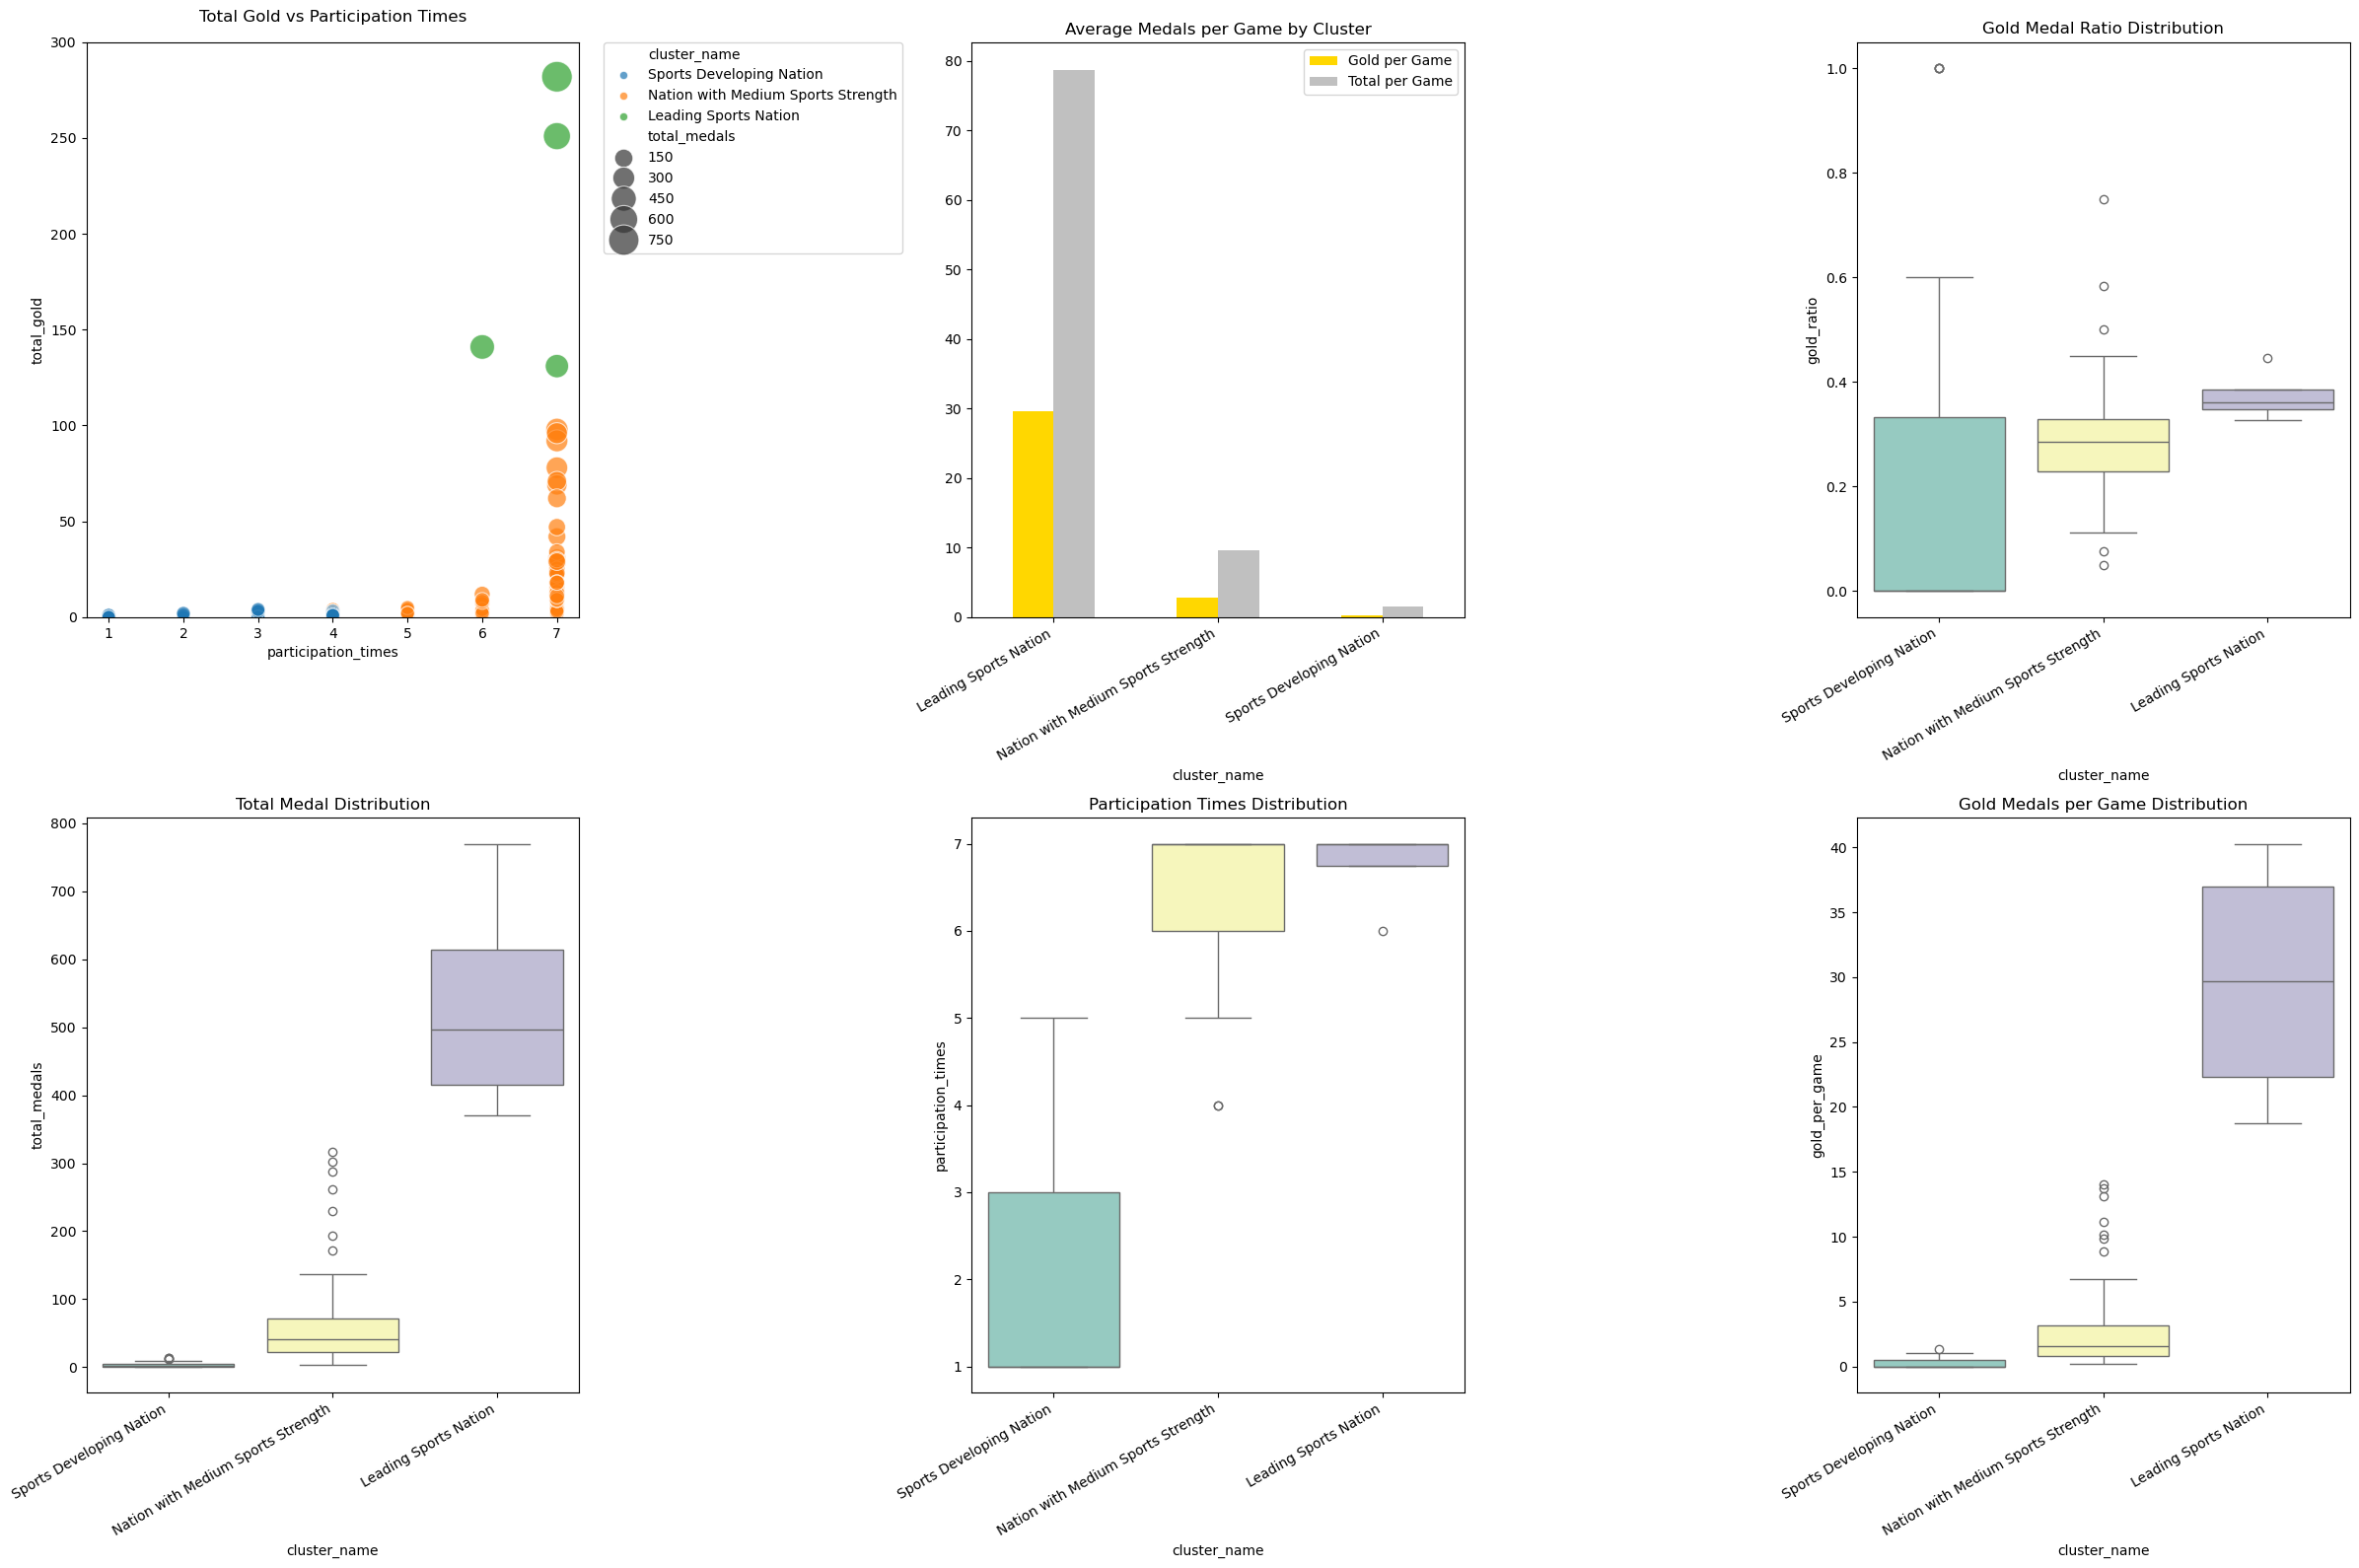


=== 详细统计信息 ===

聚类统计:
                                   gold_per_game        total_medals          \
                                            mean    std         mean     std   
cluster_name                                                                   
Leading Sports Nation                      29.59  10.15       533.50  177.05   
Nation with Medium Sports Strength          2.85   3.34        66.46   72.93   
Sports Developing Nation                    0.31   0.41         3.43    3.30   

                                   participation_times       country_code  
                                                  mean   std        count  
cluster_name                                                               
Leading Sports Nation                             6.75  0.50            4  
Nation with Medium Sports Strength                6.54  0.78           68  
Sports Developing Nation                          2.05  1.26           61  

Leading Sports Nation代表性国家（前10名）:
    c

In [16]:
# 创建分析器
analyzer = OlympicCountryAnalyzer(n_clusters=3)

# 运行分析
analyzer.fit(df_medal_20)
analyzer.analyze_clusters()
results_df = analyzer.visualize_results()

# 查看特定国家的分类结果
print("\n特定国家的分类结果:")
country_of_interest = 'CHN'
print(results_df[results_df['country_code'] == country_of_interest])

In [17]:
class OlympicCountryAnalyzer:
    def __init__(self, n_clusters=2):  # 修改默认簇数为2
        self.n_clusters = n_clusters
        self.scaler = StandardScaler()
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # 修改preprocess_data函数以处理SettingWithCopyWarning
    def preprocess_data(self, df):
        """预处理奥运会数据"""
        # 创建数据副本以避免警告
        df = df.copy()
        
        # 确保数值列的类型正确
        numeric_columns = ['Gold', 'Silver', 'Bronze', 'Total']
        for col in numeric_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # 计算每个国家的统计数据
        country_stats = df.groupby('country_code').agg({
            'Gold': ['mean', 'sum', 'count'],
            'Silver': ['mean', 'sum'],
            'Bronze': ['mean', 'sum'],
            'Total': ['mean', 'sum'],
            'Year': ['min', 'max']
        }).reset_index()
        
        # 重命名列
        country_stats.columns = ['country_code', 'gold_per_game', 'total_gold', 'participation_times',
                               'silver_per_game', 'total_silver',
                               'bronze_per_game', 'total_bronze',
                               'total_per_game', 'total_medals',
                               'first_year', 'last_year']
        
        # 确保所有数值列都是float类型
        numeric_cols = ['gold_per_game', 'total_gold', 'participation_times',
                       'silver_per_game', 'total_silver',
                       'bronze_per_game', 'total_bronze',
                       'total_per_game', 'total_medals']
        country_stats[numeric_cols] = country_stats[numeric_cols].astype(float)
        
        # 创建特征
        X = pd.DataFrame()
        X['gold_per_game'] = country_stats['gold_per_game']
        X['medal_consistency'] = country_stats['total_medals'] / country_stats['participation_times']
        X['gold_ratio'] = country_stats['total_gold'] / country_stats['total_medals'].replace(0, 1)
        X['participation_times'] = country_stats['participation_times']
        
        self.countries = country_stats['country_code']
        X_scaled = self.scaler.fit_transform(X)
        
        return X_scaled, X.columns, country_stats
    
    def fit(self, df):
        """训练模型"""
        self.X_scaled, self.feature_names, self.country_stats = self.preprocess_data(df)
        self.labels = self.kmeans.fit_predict(self.X_scaled)
        self.silhouette_avg = silhouette_score(self.X_scaled, self.labels)
        
        # 确保体育强国标签为1（通过比较中心点的金牌数）
        centers = self.kmeans.cluster_centers_
        if centers[0][0] > centers[1][0]:  # 如果簇0的金牌数更多
            self.labels = 1 - self.labels  # 翻转标签
        
        return self
    
    
    def analyze_clusters(self):
        """分析聚类结果"""
        results = self.country_stats.copy()
        
        # 首先给数据添加原始聚类标签
        results['original_cluster'] = self.labels
        
        # 计算每个簇的平均实力
        cluster_strength = results.groupby('original_cluster').agg({
            'total_medals': 'mean',
            'total_gold': 'mean'
        })
        cluster_strength['score'] = cluster_strength['total_gold'] * 3 + cluster_strength['total_medals']
        
        # 创建映射字典：将最强的簇映射为1，最弱的映射为0
        cluster_map = dict(zip(
            cluster_strength['score'].sort_values().index,
            [0, 1]  # 0:弱，1:强
        ))
        
        # 应用映射得到最终的簇标签
        results['cluster'] = results['original_cluster'].map(cluster_map)
        
         # 添加类别名称
        cluster_names = {
            1: 'Leading Sports Nation',
            0: 'Median Sports Nation'
        }
        results['cluster_name'] = results['cluster'].map(cluster_names)
        
        print("\n=== 奥运会国家分类分析 ===")
        for i in [1, 0]:  # 按实力顺序显示
            cluster_data = results[results['cluster'] == i]
            print(f"\n{cluster_names[i]}:")
            print(f"国家数量: {len(cluster_data)}")
            
            print("\n代表性国家（按总奖牌数排序）:")
            top_countries = cluster_data.sort_values('total_medals', ascending=False).head(10)[
                ['country_code', 'total_gold', 'total_medals', 'participation_times', 'gold_per_game']]
            print(top_countries.to_string(float_format=lambda x: '{:.1f}'.format(x)))
            
            print(f"\n{cluster_names[i]}统计指标:")
            print(f"平均每届金牌数: {cluster_data['gold_per_game'].mean():.2f}")
            print(f"平均每届总奖牌数: {cluster_data['total_per_game'].mean():.2f}")
            print(f"平均参赛次数: {cluster_data['participation_times'].mean():.1f}")
            print(f"平均总金牌数: {cluster_data['total_gold'].mean():.1f}")
            print(f"平均总奖牌数: {cluster_data['total_medals'].mean():.1f}")
            print(f"金牌占总奖牌比例: {(cluster_data['total_gold'].sum() / cluster_data['total_medals'].sum() * 100):.1f}%")
        
        self.labels = results['cluster']
        self.cluster_names = cluster_names
        
        return results

    

    def visualize_results(self):
        """可视化聚类结果"""
        # 准备数据
        results = self.country_stats.copy()
        results['cluster'] = self.labels
        
        # 计算金牌比例
        results['gold_ratio'] = (results['total_gold'] / 
                                results['total_medals'].replace(0, 1))
        
        # 添加类别名称
        cluster_names = {
            1: 'Leading Sports Nation',
            0: 'Median Sports Nation'
        }
        results['cluster_name'] = results['cluster'].map(cluster_names)
        
        # 创建 2x3 的子图布局
        fig, axes = plt.subplots(2, 3, figsize=(24, 16))
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        
        # 绘制图表的代码保持不变，只需要更新颜色方案
        # 1. 散点图
        sns.scatterplot(data=results, 
                        x='participation_times', 
                        y='total_gold',
                        hue='cluster_name', 
                        size='total_medals',
                        sizes=(100, 500),
                        palette=['lightblue', 'red'],  # 更新颜色
                        alpha=0.7,
                        ax=axes[0,0])

        # 2. 各组平均指标对比
        metrics = ['gold_per_game', 'total_per_game']
        cluster_means = results.groupby('cluster_name')[metrics].mean()
        cluster_means.plot(kind='bar', ax=axes[0,1], color=['gold', 'silver'])
        axes[0,1].set_title('Average Medals per Game by Cluster', fontsize=12)
        axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=30, ha='right')
        axes[0,1].legend(['Gold per Game', 'Total per Game'])
        
        # 3. 金牌比例分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='gold_ratio',
                    ax=axes[0,2],
                    palette='Set3')
        axes[0,2].set_title('Gold Medal Ratio Distribution', fontsize=12)
        axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30, ha='right')
        
        # 4. 总奖牌数分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='total_medals',
                    ax=axes[1,0],
                    palette='Set3')
        axes[1,0].set_title('Total Medal Distribution', fontsize=12)
        axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=30, ha='right')
        
        # 5. 参赛次数分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='participation_times',
                    ax=axes[1,1],
                    palette='Set3')
        axes[1,1].set_title('Participation Times Distribution', fontsize=12)
        axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=30, ha='right')
        
        # 6. 每届平均金牌数分布
        sns.boxplot(data=results, 
                    x='cluster_name', 
                    y='gold_per_game',
                    ax=axes[1,2],
                    palette='Set3')
        axes[1,2].set_title('Gold Medals per Game Distribution', fontsize=12)
        axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=30, ha='right')
        
        # 调整整体布局
        plt.tight_layout()
        plt.show()
        
        # 打印详细统计信息
        print("\n=== 详细统计信息 ===")
        stats = results.groupby('cluster_name').agg({
            'gold_per_game': ['mean', 'std'],
            'total_medals': ['mean', 'std'],
            'participation_times': ['mean', 'std'],
            'country_code': 'count'
        }).round(2)
        print("\n聚类统计:")
        print(stats)
        
        # 打印各类别代表性国家
        for cluster in [1, 0]:  # 按实力顺序打印
            print(f"\n{cluster_names[cluster]}代表性国家（前10名）:")
            top_countries = results[results['cluster'] == cluster].sort_values(
                'total_medals', ascending=False)
            print(top_countries[['country_code', 'total_gold', 'total_medals', 
                               'participation_times', 'gold_per_game']].head(10).to_string())
        
        # 返回分类结果
        return results[['country_code', 'cluster_name', 'total_medals', 'total_gold', 
                       'participation_times', 'gold_per_game', 'gold_ratio']]
        

D:\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1179421076.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results,



=== 奥运会国家分类分析 ===

Leading Sports Nation:
国家数量: 8

代表性国家（按总奖牌数排序）:
    country_code  total_gold  total_medals  participation_times  gold_per_game
126          USA       282.0         770.0                  7.0           40.3
21           CHN       251.0         563.0                  7.0           35.9
102          RUS       141.0         431.0                  6.0           23.5
44           GBR       131.0         370.0                  7.0           18.7
5            AUS        98.0         317.0                  7.0           14.0
46           GER        92.0         302.0                  7.0           13.1
42           FRA        78.0         288.0                  7.0           11.1
63           JPN        96.0         262.0                  7.0           13.7

Leading Sports Nation统计指标:
平均每届金牌数: 21.29
平均每届总奖牌数: 60.26
平均参赛次数: 6.9
平均总金牌数: 146.1
平均总奖牌数: 412.9
金牌占总奖牌比例: 35.4%

Median Sports Nation:
国家数量: 125

代表性国家（按总奖牌数排序）:
    country_code  total_gold  total_medals  participatio

C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1179421076.py:171: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=30, ha='right')
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1179421076.py:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results,
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1179421076.py:180: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=30, ha='right')
C:\Users\YL\AppData\Local\Temp\ipykernel_36292\1179421076.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

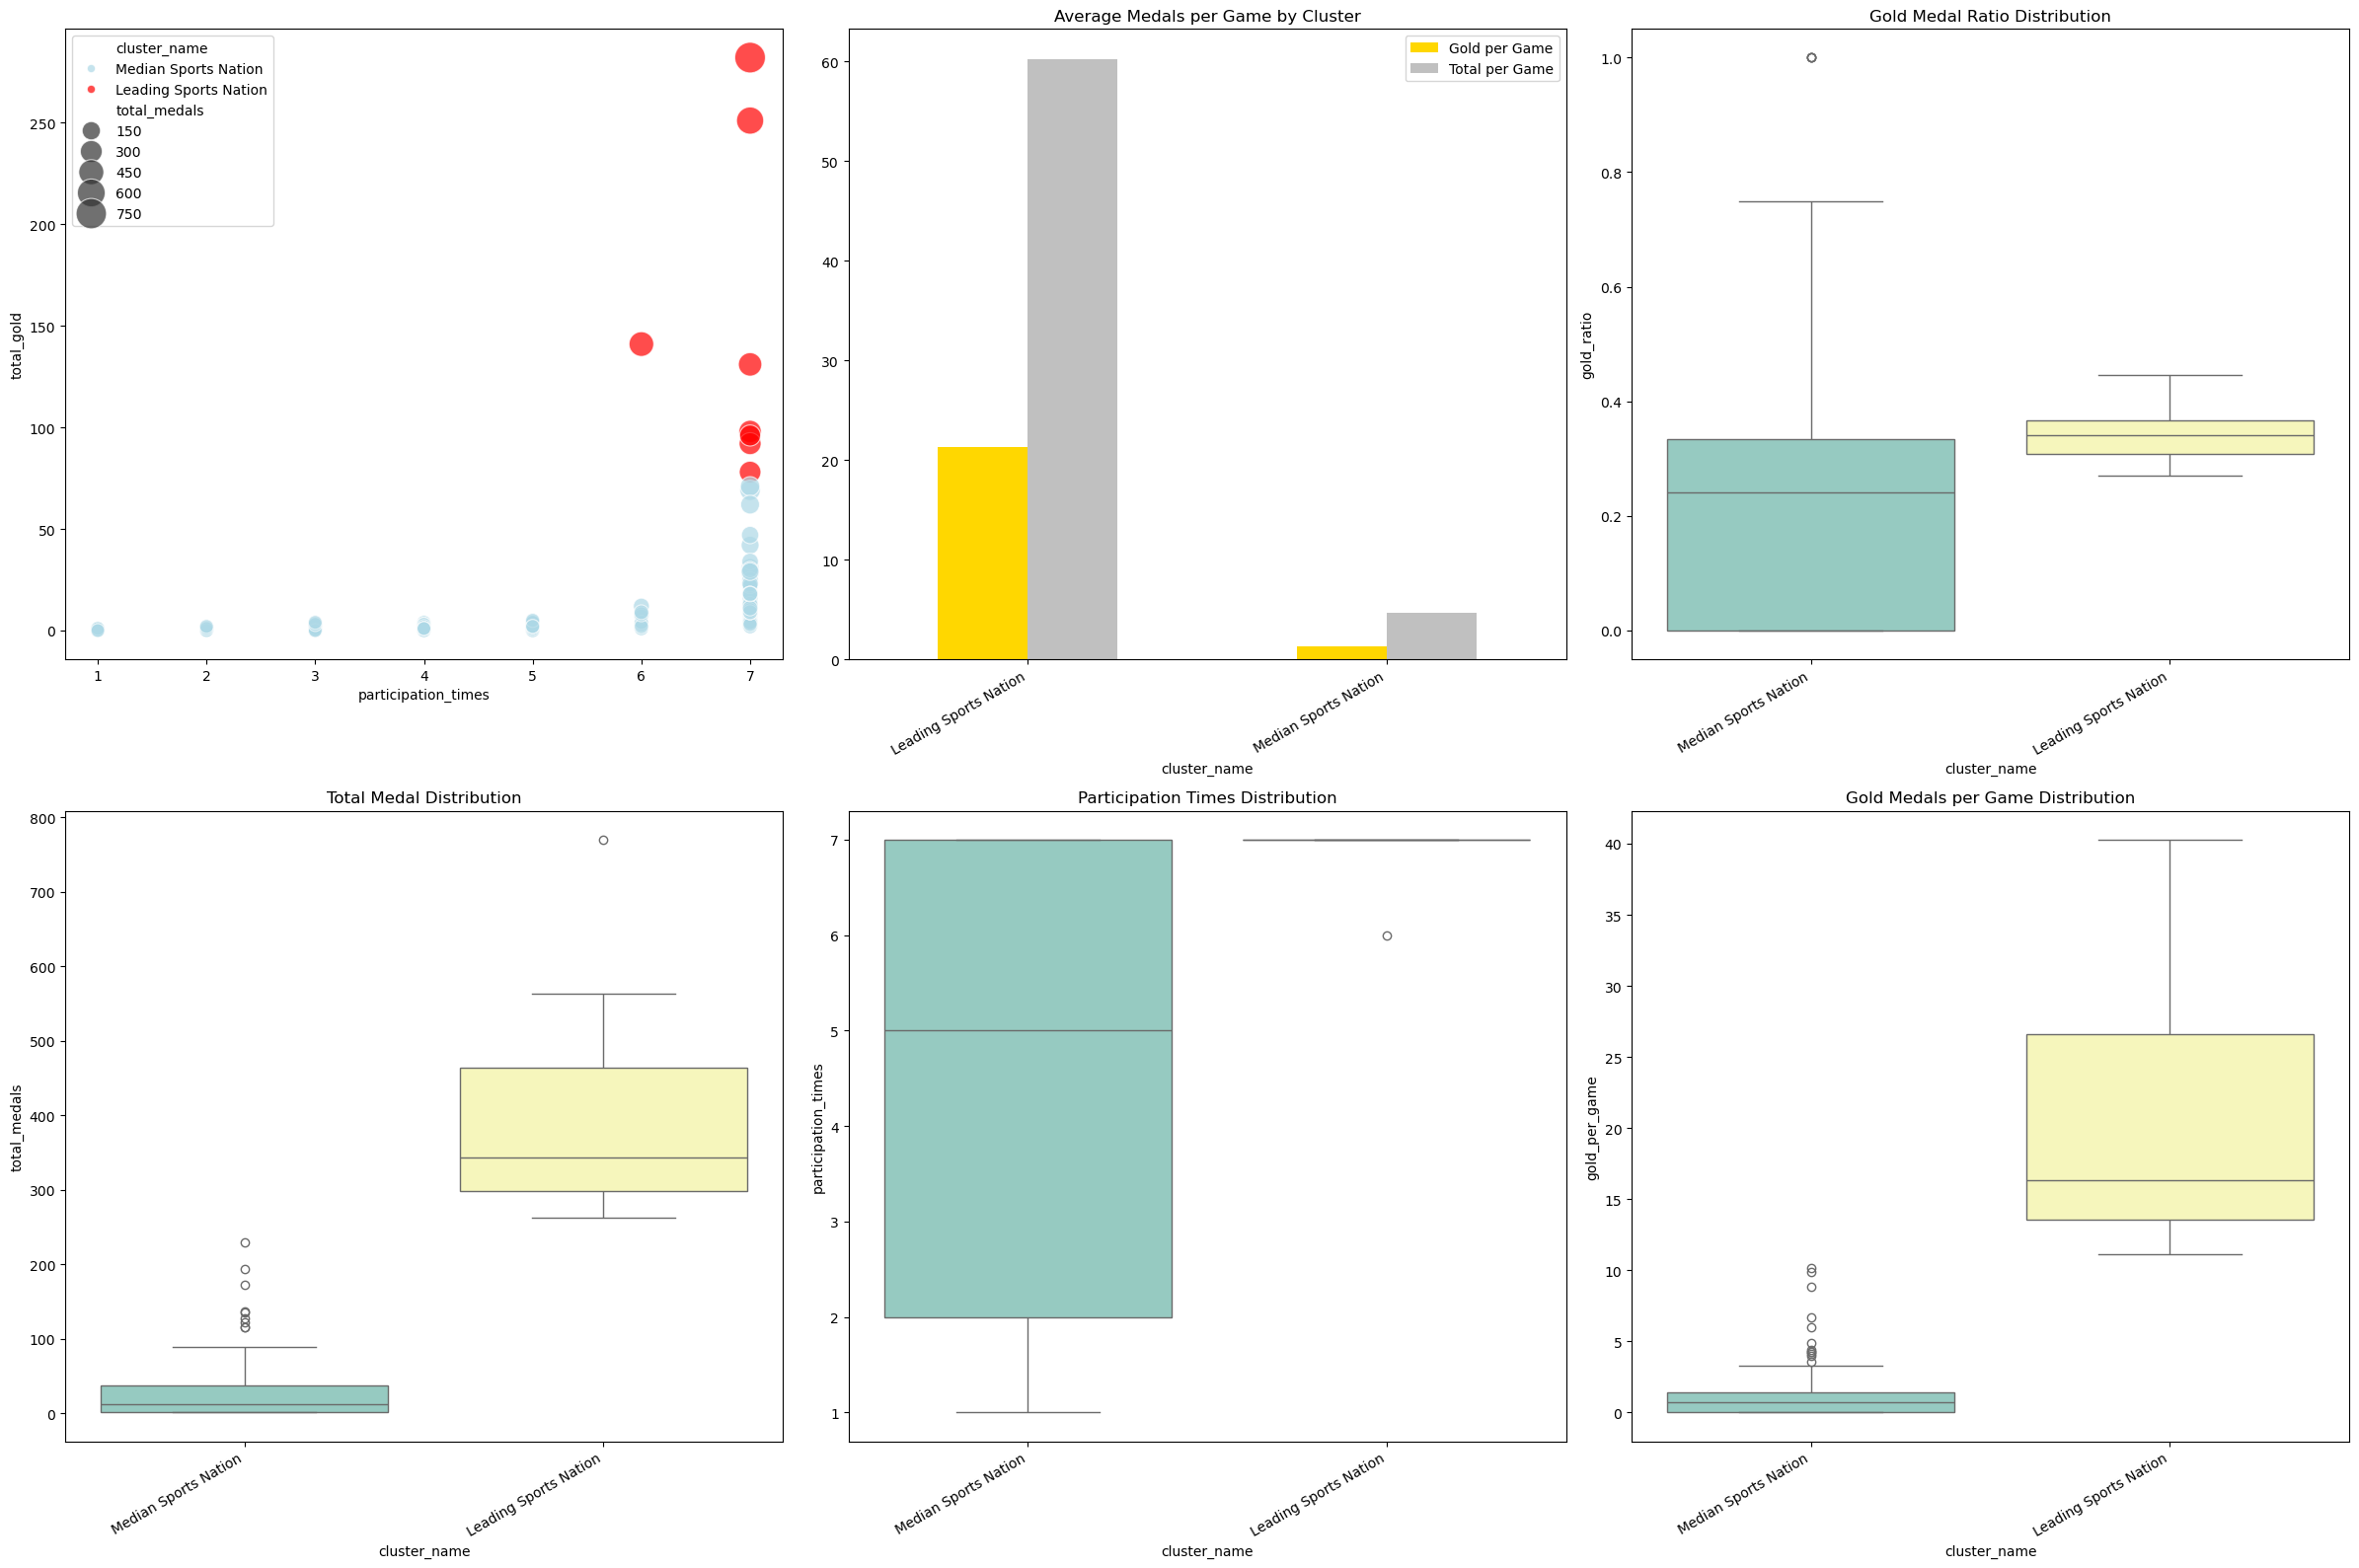


=== 详细统计信息 ===

聚类统计:
                      gold_per_game        total_medals          \
                               mean    std         mean     std   
cluster_name                                                      
Leading Sports Nation         21.29  11.11       412.88  174.06   
Median Sports Nation           1.28   1.86        28.47   41.49   

                      participation_times       country_code  
                                     mean   std        count  
cluster_name                                                  
Leading Sports Nation                6.88  0.35            8  
Median Sports Nation                 4.34  2.47          125  

Leading Sports Nation代表性国家（前10名）:
    country_code  total_gold  total_medals  participation_times  gold_per_game
126          USA       282.0         770.0                  7.0      40.285714
21           CHN       251.0         563.0                  7.0      35.857143
102          RUS       141.0         431.0            

In [18]:
# 创建分析器
analyzer = OlympicCountryAnalyzer(n_clusters=2)

# 运行分析
analyzer.fit(df_medal_20)
cluster = analyzer.analyze_clusters()
results_df = analyzer.visualize_results()

# 查看特定国家的分类结果
print("\n特定国家的分类结果:")
country_of_interest = 'CHN'
print(results_df[results_df['country_code'] == country_of_interest])

In [19]:
# 创建基本的分类DataFrame
classified_countries = cluster[['country_code', 'cluster_name']]

# 添加那些从未获得过奖牌的国家（从countries_3列表中）
no_medal_countries = pd.DataFrame({
    'country_code': countries_3,
    'cluster_name': ['Sports Developing Nation'] * len(countries_3)
})

# 合并两个DataFrame
final_classification = pd.concat([classified_countries, no_medal_countries], ignore_index=True)

# 重命名列（如果需要）
final_classification.columns = ['Country', 'Category']

# 按国家名称排序
final_classification = final_classification.sort_values('Country').reset_index(drop=True)

In [25]:
#现在我们需要根据不同国家的体育实力进行分类训练预测模型：
#首先需要对奖牌榜进行分解，分析奖牌的构成（每个国家在对应的项目中分别获得奖牌多少枚）

def analyze_olympic_data(df):
    """
    分析奥运会数据，按国家和年份统计参赛情况
    
    参数:
    df: 原始奥运会数据DataFrame
    
    返回:
    包含统计结果的DataFrame
    """
    # 创建奖牌统计列
    df['Gold'] = (df['Medal'] == 'Gold').astype(int)
    df['Silver'] = (df['Medal'] == 'Silver').astype(int)
    df['Bronze'] = (df['Medal'] == 'Bronze').astype(int)
    
    # 按国家(NOC)、年份和运动项目分组统计
    stats = df.groupby(['NOC', 'Year', 'Sport']).agg({
        'Name': 'count',  # 总运动员数
        'Gold': 'sum',
        'Silver': 'sum',
        'Bronze': 'sum'
    }).reset_index()
    
    # 计算总奖牌数（金银铜之和）
    stats['Total_Medals'] = stats['Gold'] + stats['Silver'] + stats['Bronze']
    
    # 重命名列
    stats.columns = ['NOC', 'Year', 'Sport', 'Athletes_Count', 
                    'Gold_Medals', 'Silver_Medals', 'Bronze_Medals', 'Total_Medals']
    
    # 计算每个国家每年的总体统计
    yearly_stats = df.groupby(['NOC', 'Year']).agg({
        'Name': 'count',  # 总运动员数
        'Sport': 'nunique',  # 参与的运动项目数
        'Gold': 'sum',
        'Silver': 'sum',
        'Bronze': 'sum'
    }).reset_index()
    
    # 计算年度总奖牌数
    yearly_stats['Total_Medals'] = yearly_stats['Gold'] + yearly_stats['Silver'] + yearly_stats['Bronze']
    
    # 重命名列
    yearly_stats.columns = ['NOC', 'Year', 'Total_Athletes', 
                          'Sports_Count', 'Total_Gold', 'Total_Silver', 
                          'Total_Bronze', 'Total_Medals']
    
    return stats, yearly_stats

# 使用函数
detailed_stats, yearly_summary = analyze_olympic_data(df_athlete)

# 打印某个国家的统计结果示例
country_code = 'CHN'  # 中国的NOC代码
print(f"\n=== {country_code}的年度统计 ===")
print(yearly_summary[yearly_summary['NOC'] == country_code].sort_values('Year'))

print(f"\n=== {country_code}在2020年的详细运动项目统计 ===")
print(detailed_stats[(detailed_stats['NOC'] == country_code) & 
                    (detailed_stats['Year'] == 2020)].sort_values('Total_Medals', ascending=False))

# 保存结果到Excel文件
with pd.ExcelWriter('olympic_analysis.xlsx') as writer:
    detailed_stats.to_excel(writer, sheet_name='Detailed_Stats', index=False)
    yearly_summary.to_excel(writer, sheet_name='Yearly_Summary', index=False)


=== CHN的年度统计 ===
     NOC  Year  Total_Athletes  Sports_Count  Total_Gold  Total_Silver  \
592  CHN  1932               2             1           0             0   
593  CHN  1936              65             7           0             0   
594  CHN  1948              33             6           0             0   
595  CHN  1952               1             1           0             0   
596  CHN  1984             323            19          24            13   
597  CHN  1988             427            25           6            16   
598  CHN  1992             394            23          18            45   
599  CHN  1996             438            25          19            70   
600  CHN  2000             414            28          39            23   
601  CHN  2004             518            31          52            27   
602  CHN  2008             730            34          74            53   
603  CHN  2012             479            29          56            40   
604  CHN  2016      

In [26]:
#增加host对应的NOC三字符缩写
df_host['NOC'] = pd.Series(['GRE','FRA','USA','GBR','SWE','GER','BEL','FRA','NED','USA','GER','JPN','GBR','GBR','FIN','AUS','ITA','JPN','MEX','GER','CAN','URS','USA','KOR','ESP',
                            'USA','AUS','GRE','CHN','GBR','BRA','JPN','FRA','USA','AUS'])

# 创建东道主信息的DataFrame
host_info = df_host[['Year', 'NOC']].copy()
host_info['Is_Host'] = True

# 合并东道主信息到奖牌信息DataFrame中
yearly_summary = pd.merge(yearly_summary, host_info, on=['NOC','Year'], how='left')

yearly_summary['Is_Host'] = yearly_summary['Is_Host'].fillna(False)

C:\Users\YL\AppData\Local\Temp\ipykernel_36292\3997685172.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yearly_summary['Is_Host'] = yearly_summary['Is_Host'].fillna(False)


In [27]:
yearly_summary

,NOC,Year,Total_Athletes,Sports_Count,Total_Gold,Total_Silver,Total_Bronze,Total_Medals,Is_Host
0,AFG,1936,16,2,0,0,0,0,False
1,AFG,1948,25,2,0,0,0,0,False
2,AFG,1956,12,1,0,0,0,0,False
3,AFG,1960,16,2,0,0,0,0,False
4,AFG,1964,8,1,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...
3217,ZIM,2008,16,6,1,3,0,4,False
3218,ZIM,2012,9,4,0,0,0,0,False
3219,ZIM,2016,31,7,0,0,0,0,False
3220,ZIM,2020,5,4,0,0,0,0,False



=== 奥运会规模增长分析 ===

各指标的年度增长率(%):
      Total Events  Total Disciplines  Total Sports
Year                                               
1896           NaN                NaN           NaN
1900        125.58             120.00         81.82
1904         -2.06             -18.18        -20.00
1906        -20.00             -27.78        -31.25
1908         44.74              92.31        100.00
1912         -7.27             -28.00        -36.36
1920         52.94              61.11         57.14
1924        -19.23             -20.69        -22.73
1928        -13.49             -13.04        -17.65
1932          7.34               0.00          0.00
1936         10.26              25.00         35.71
1948          5.43              -8.00        -10.53
1952          9.56               0.00          0.00
1956          1.34               0.00          0.00
1960         -0.66               0.00          0.00
1964          8.67               8.70         11.76
1968          5.52            

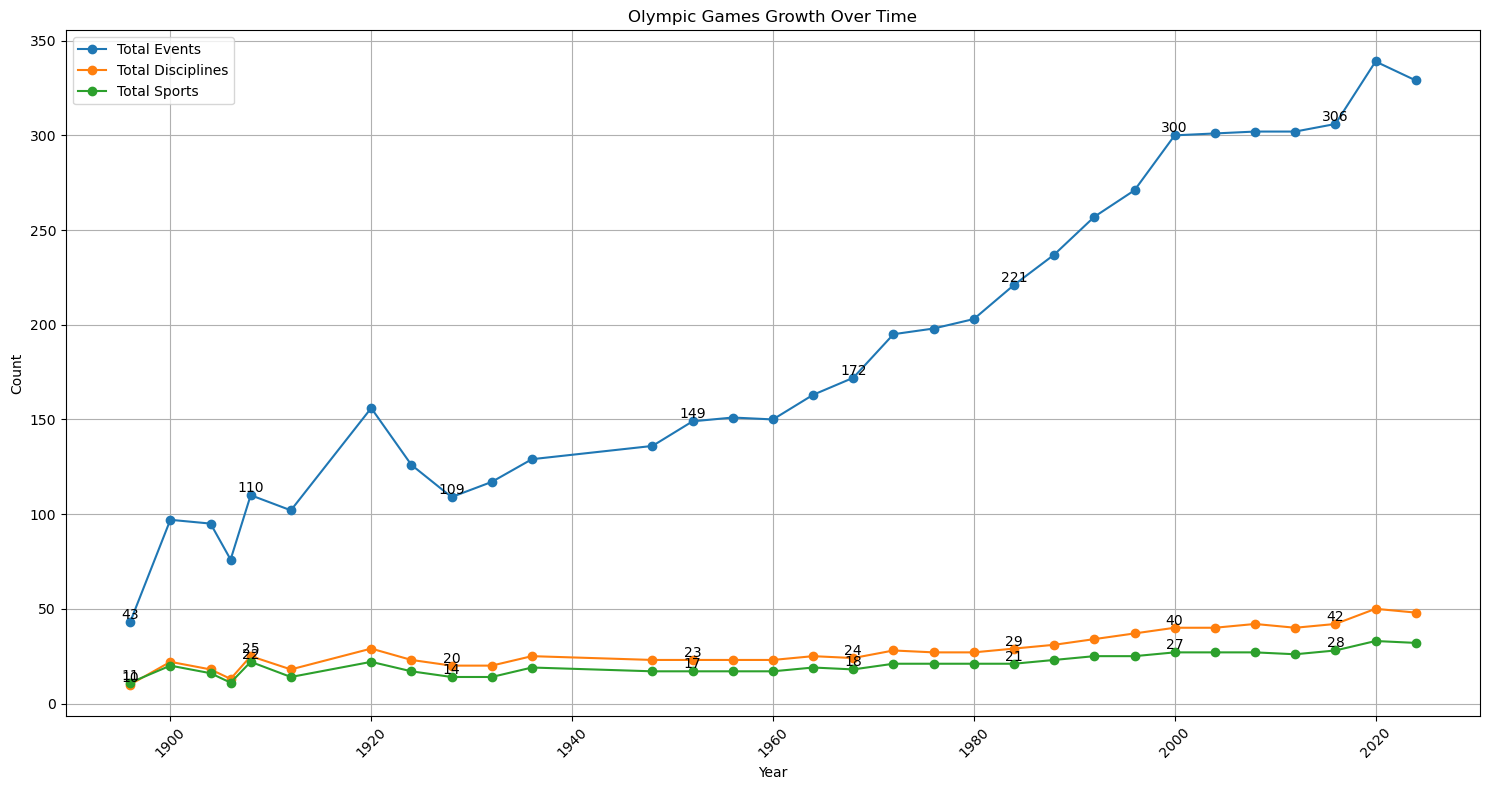


基本统计信息:
       Total Events  Total Disciplines  Total Sports
count         31.00              31.00         31.00
mean         188.45              28.35         20.71
std           84.65               9.86          5.63
min           43.00              10.00         11.00
25%          121.50              23.00         17.00
50%          163.00              25.00         21.00
75%          264.00              35.50         25.00
max          339.00              50.00         33.00


In [28]:
def transform_olympic_totals(df):
    """
    转置奥运会总数据
    
    参数:
    df: 包含Total events, Total disciplines, Total sports的DataFrame
    
    返回:
    转置后的DataFrame
    """
    # 提取最后三行
    totals_df = df.iloc[-3:].copy()
    
    # 设置索引为第一列
    totals_df = totals_df.set_index('Sports Governing Body')
    
    # 转置数据
    transformed_df = totals_df.T
    
    # 重命名列
    transformed_df.columns = ['Total Events', 'Total Disciplines', 'Total Sports']
    
    # 将索引名称改为'Year'
    transformed_df.index.name = 'Year'
    
    # 确保数据类型为数值型，并只保留年份行
    transformed_df = transformed_df.apply(pd.to_numeric, errors='coerce').iloc[3:,:]
    
    # 处理索引中的特殊年份标记
    transformed_df.index = transformed_df.index.str.replace('*', '', regex=False)
    transformed_df.index = pd.to_numeric(transformed_df.index, errors='coerce')
    
    # 删除可能产生的NaN索引
    transformed_df = transformed_df.dropna(axis=0, how='any')
    
    return transformed_df

# 使用函数转换数据
df_totals_transformed = transform_olympic_totals(df_programs)

def analyze_olympic_growth(df):
    """分析奥运会规模的增长趋势"""
    print("\n=== 奥运会规模增长分析 ===")
    
    # 计算各指标的增长率
    growth_rates = df.pct_change() * 100
    
    print("\n各指标的年度增长率(%):")
    print(growth_rates.round(2))
    
    # 计算总体增长倍数
    total_growth = (df.iloc[-1] / df.iloc[0]).round(2)
    print("\n从首届到最近一届的总增长倍数:")
    print(total_growth)
    
    return growth_rates, total_growth

def analyze_periods(df):
    """分析不同时期的发展特征"""
    # 定义时期
    periods = {
        'Early Period': (1896, 1912),
        'Inter-War Period': (1920, 1936),
        'Post-War Period': (1948, 1988),
        'Modern Era': (1992, 2024)
    }
    
    period_stats = {}
    for period_name, (start_year, end_year) in periods.items():
        # 使用比较运算符进行年份筛选
        period_data = df[(df.index >= start_year) & (df.index <= end_year)]
        if not period_data.empty:
            period_stats[period_name] = {
                'Average Events': period_data['Total Events'].mean(),
                'Average Sports': period_data['Total Sports'].mean(),
                'Max Events': period_data['Total Events'].max(),
                'Growth Rate': ((period_data['Total Events'].iloc[-1] / 
                               period_data['Total Events'].iloc[0] - 1) * 100)
            }
    
    return pd.DataFrame(period_stats).round(2)

def visualize_olympic_growth(df):
    """可视化奥运会规模的变化趋势"""
    plt.figure(figsize=(15, 8))
    
    # 绘制三个指标的变化趋势
    for column in df.columns:
        plt.plot(df.index, df[column], marker='o', label=column)
    
    plt.title('Olympic Games Growth Over Time')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # 添加数值标签
    for column in df.columns:
        for i, value in enumerate(df[column]):
            if i % 4 == 0:  # 每隔4个数据点显示一个标签
                plt.text(df.index[i], value, f'{value:.0f}', 
                        horizontalalignment='center', 
                        verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()

# 主执行流程
# 1. 转换数据
df_totals_transformed = transform_olympic_totals(df_programs)

# 2. 进行增长分析
growth_rates, total_growth = analyze_olympic_growth(df_totals_transformed)

# 3. 进行时期分析
period_analysis = analyze_periods(df_totals_transformed)
print("\n不同时期的发展特征:")
print(period_analysis)

# 4. 可视化展示
visualize_olympic_growth(df_totals_transformed)

# 5. 显示基本统计信息
print("\n基本统计信息:")
print(df_totals_transformed.describe().round(2))


=== 奥运会项目发展分析 ===

各项运动的发展趋势:
Year                   1896  1900  1904  1908  1912  1920  1924  1928  1932  \
Sport                                                                         
Aquatics                4.0   8.0  12.0   9.0  14.0  16.0  17.0  16.0  16.0   
Archery                 NaN   7.0   6.0   3.0   NaN  10.0   NaN   NaN   NaN   
Athletics              12.0  23.0  25.0  26.0  30.0  29.0  27.0  27.0  29.0   
Badminton               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Baseball and Softball   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Basketball              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Basque Pelota           NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Boxing                  NaN   NaN   7.0   5.0   NaN   8.0   8.0   8.0   8.0   
Breaking                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Canoeing                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cricket              

<Figure size 2000x1500 with 0 Axes>

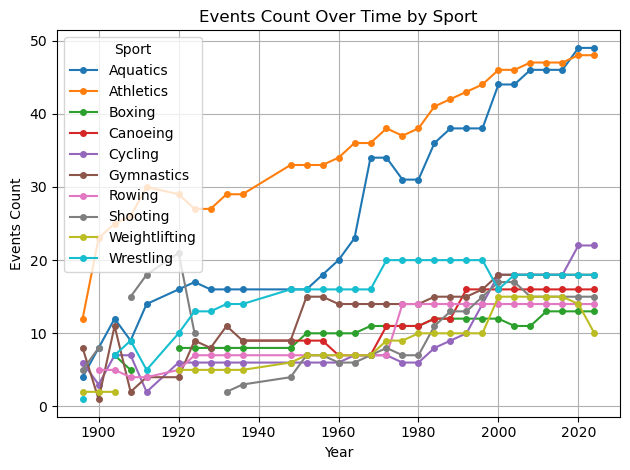

In [30]:
df_programs_detailed = df_programs.iloc[0:71,:]

def transform_olympic_programs(df_programs):
    """
    将奥运会项目数据从宽格式转换为长格式
    
    参数:
    df_programs: 原始的奥运会项目数据DataFrame
    
    返回:
    转换后的长格式DataFrame
    """
    # 首先复制数据框
    df = df_programs.copy()
    
    # 获取年份列（去掉非年份的列）
    year_columns = [col for col in df.columns if str(col).isdigit()]
    
    # 保留需要的列
    id_columns = ['Sport', 'Discipline', 'Code', 'Sports Governing Body']
    
    # 使用melt函数进行转换
    df_long = pd.melt(
        df,
        id_vars=id_columns,
        value_vars=year_columns,
        var_name='Year',
        value_name='Events_Count'
    )
    
    # 转换Year列为整数类型
    df_long['Year'] = pd.to_numeric(df_long['Year'])
    
    # 处理NaN值
    df_long['Events_Count'] = pd.to_numeric(df_long['Events_Count'], errors='coerce')
    
    # 过滤掉没有项目的年份（Events_Count为0或NaN的行）
    df_long = df_long[df_long['Events_Count'].notna() & (df_long['Events_Count'] > 0)]
    
    # 重新排序列
    df_long = df_long.sort_values(['Year', 'Sport', 'Discipline'])
    
    # 重置索引
    df_long = df_long.reset_index(drop=True)
    
    return df_long

# 使用函数转换数据
df_transformed = transform_olympic_programs(df_programs_detailed)

# 添加一些基本的统计分析
def analyze_olympic_programs(df_transformed):
    """分析转换后的奥运会项目数据"""
    print("\n=== 奥运会项目发展分析 ===")
    
    # 1. 各大项运动的发展趋势
    sport_trends = df_transformed.pivot_table(
        index='Sport',
        columns='Year',
        values='Events_Count',
        aggfunc='sum'
    )
    print("\n各项运动的发展趋势:")
    print(sport_trends)
    
    # 2. 增长最快的运动项目
    recent_years = df_transformed[df_transformed['Year'] >= 2000]
    sport_growth = recent_years.groupby('Sport')['Events_Count'].agg(['mean', 'std'])
    print("\n近年来项目数量最多的运动:")
    print(sport_growth.nlargest(10, 'mean'))
    
    return sport_trends, sport_growth

# 使用函数进行分析
sport_trends, sport_growth = analyze_olympic_programs(df_transformed)

# 可视化分析
def visualize_olympic_programs(df_transformed):
    
    """可视化奥运会项目发展趋势"""
    plt.figure(figsize=(20, 15))
    top_sports = df_transformed.groupby(['Sport'])['Events_Count'].sum().nlargest(10).index
    data_sports = pd.DataFrame(df_transformed[df_transformed['Sport'].isin(top_sports)].groupby(['Year','Sport'])['Events_Count'].sum())
    # 将数据透视，以年份为索引，运动项目为列，事件数量为值
    data_pivot = data_sports.pivot_table(index='Year', columns='Sport', values='Events_Count')

    data_pivot.plot(kind='line',marker = 'o',markersize=4)  # 绘制线图
    
    plt.title('Events Count Over Time by Sport')  # 设置标题
    plt.xlabel('Year')  # 设置x轴标签
    plt.ylabel('Events Count')  # 设置y轴标签
    plt.legend(title='Sport')  # 设置图例标题
    plt.grid(True)  # 显示网格
    plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
    
    plt.show()

# 使用函数进行可视化
visualize_olympic_programs(df_transformed)

# 保存转换后的数据（可选）
df_transformed.to_excel('olympic_programs_transformed.xlsx', index=False)

In [31]:
df_totals_transformed

,Total Events,Total Disciplines,Total Sports
Year,,,
1896,43.0,10.0,11.0
1900,97.0,22.0,20.0
1904,95.0,18.0,16.0
1906,76.0,13.0,11.0
1908,110.0,25.0,22.0
1912,102.0,18.0,14.0
1920,156.0,29.0,22.0
1924,126.0,23.0,17.0
1928,109.0,20.0,14.0


In [32]:
yearly_summary = pd.merge(yearly_summary,df_totals_transformed, on=['Year'], how='left')

In [33]:
yearly_summary['sports coverage'] = yearly_summary['Sports_Count']/yearly_summary['Total Sports']
yearly_summary['Gold winning rate'] = yearly_summary['Total_Gold']/yearly_summary['Total Events']
yearly_summary['Silver winning rate'] = yearly_summary['Total_Silver']/yearly_summary['Total Events']
yearly_summary['Bronze winning rate'] = yearly_summary['Total_Bronze']/yearly_summary['Total Events']
yearly_summary['Medal winning rate'] = yearly_summary['Total_Medals']/(3*yearly_summary['Total Events'])
yearly_summary

,NOC,Year,Total_Athletes,Sports_Count,Total_Gold,Total_Silver,Total_Bronze,Total_Medals,Is_Host,Total Events,Total Disciplines,Total Sports,sports coverage,Gold winning rate,Silver winning rate,Bronze winning rate,Medal winning rate
0,AFG,1936,16,2,0,0,0,0,False,129.0,25.0,19.0,0.105263,0.000000,0.000000,0.0,0.000000
1,AFG,1948,25,2,0,0,0,0,False,136.0,23.0,17.0,0.117647,0.000000,0.000000,0.0,0.000000
2,AFG,1956,12,1,0,0,0,0,False,151.0,23.0,17.0,0.058824,0.000000,0.000000,0.0,0.000000
3,AFG,1960,16,2,0,0,0,0,False,150.0,23.0,17.0,0.117647,0.000000,0.000000,0.0,0.000000
4,AFG,1964,8,1,0,0,0,0,False,163.0,25.0,19.0,0.052632,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ZIM,2008,16,6,1,3,0,4,False,302.0,42.0,27.0,0.222222,0.003311,0.009934,0.0,0.004415
3218,ZIM,2012,9,4,0,0,0,0,False,302.0,40.0,26.0,0.153846,0.000000,0.000000,0.0,0.000000
3219,ZIM,2016,31,7,0,0,0,0,False,306.0,42.0,28.0,0.250000,0.000000,0.000000,0.0,0.000000
3220,ZIM,2020,5,4,0,0,0,0,False,339.0,50.0,33.0,0.121212,0.000000,0.000000,0.0,0.000000


In [34]:
mapping_dict = {
    'Athletics': 'Athletics',
    'Hockey': 'Field hockey',  # "Hockey" -> "Field hockey"
    'Football': 'Football',
    'Wrestling': 'Greco-Roman',  # "Wrestling" -> "Greco-Roman"
    'Boxing': 'Boxing',
    'Judo': 'Judo',
    'Taekwondo': 'Taekwondo',
    'Shooting': 'Shooting',
    'Swimming': 'Swimming',
    'Cycling Road': 'Road',  # "Cycling Road" -> "Road"
    'Weightlifting': 'Weightlifting',
    'Fencing': 'Fencing',
    'Synchronized Swimming': 'Artistic Swimming',  # "Synchronized Swimming" -> "Artistic Swimming"
    'Sailing': 'Sailing',
    'Equestrianism': 'Dressage',  # "Equestrianism" -> "Dressage" (assuming they refer to the same sport)
    'Triathlon': 'Triathlon',
    'Canoe Sprint': 'Canoeing',  # "Canoe Sprint" -> "Canoeing"
    'Rowing': 'Rowing',
    'Tennis': 'Tennis',
    'Trampoline Gymnastics': 'Trampoline',  # "Trampoline Gymnastics" -> "Trampoline"
    'Cycling': 'Cycling',  # "Cycling" -> "Cycling" (generally, the main term)
    'Artistic Gymnastics': 'Artistic',  # "Artistic Gymnastics" -> "Artistic"
    'Gymnastics': 'Rhythmic',  # "Gymnastics" -> "Rhythmic" (assuming this is referring to Rhythmic Gymnastics)
    'Handball': 'Handball',
    'Volleyball': 'Volleyball',
    'Table Tennis': 'Table Tennis',
    'Trampolining': 'Trampoline',  # "Trampolining" -> "Trampoline"
    'Badminton': 'Badminton',
    'Karate': 'Karate',
    'Marathon Swimming': 'Marathon Swimming',  # "Marathon Swimming" -> "Marathon Swimming"
    'Canoe Slalom': 'Canoeing',  # "Canoe Slalom" -> "Canoeing"
    'Canoeing': 'Canoeing',
    'Basketball': 'Basketball',
    'Beach Volleyball': 'Beach',  # "Beach Volleyball" -> "Beach"
    'Diving': 'Diving',
    'Rugby': 'Sevens',  # "Rugby" -> "Sevens" (assuming this refers to Rugby Sevens)
    'Figure Skating': 'Figure',  # "Figure Skating" -> "Figure"
    'Polo': 'Polo',
    'Water Polo': 'Water Polo',
    'Art Competitions': 'Art Competitions',
    'Modern Pentathlon': 'Eventing',  # "Modern Pentathlon" -> "Eventing"
    'Archery': 'Archery',
    'Golf': 'Golf',
    'Rugby Sevens': 'Rugby Sevens',
    'Cycling BMX Racing': 'BMX Racing',  # "Cycling BMX Racing" -> "BMX Racing"
    'Cycling Mountain Bike': 'Mountain Bike',  # "Cycling Mountain Bike" -> "Mountain Bike"
    'Equestrian': 'Dressage',  # "Equestrian" -> "Dressage" (general Equestrian term)
    'Surfing': 'Surfing',
    'Cycling BMX Freestyle': 'BMX Freestyle',  # "Cycling BMX Freestyle" -> "BMX Freestyle"
    'Skateboarding': 'Skateboarding',
    'Rhythmic Gymnastics': 'Rhythmic',  # "Rhythmic Gymnastics" -> "Rhythmic"
    'Baseball': 'Baseball',
    'Softball': 'Softball',
    'Artistic Swimming': 'Artistic Swimming',
    'Baseball/Softball': 'Baseball',  # "Baseball/Softball" -> "Baseball"
    'Cycling Track': 'Track',  # "Cycling Track" -> "Track"
    'Sport Climbing': 'Sport Climbing',
    '3x3 Basketball': '3x3',  # "3x3 Basketball" -> "3x3"
    '3x3 Basketball, Basketball': '3x3',  # "3x3 Basketball, Basketball" -> "3x3"
    'Breaking': 'Breaking',
    'Marathon Swimming, Swimming': 'Marathon Swimming',  # "Marathon Swimming, Swimming" -> "Marathon Swimming"
    'Tug-Of-War': 'Tug of War',  # "Tug-Of-War" -> "Tug of War"
    'Ice Hockey': 'Ice Hockey',
    'Cycling Road, Cycling Track': 'Cycling',  # "Cycling Road, Cycling Track" -> "Cycling"
    'Lacrosse': 'Indoor',  # "Lacrosse" -> "Indoor" (historical events)
    'Basque Pelota': 'Basque Pelota',
    'Cricket': 'Cricket',
    'Croquet': 'Croquet',
    'Motorboating': 'Aeronautics',  # "Motorboating" -> "Aeronautics" (historical event)
    'Jeu De Paume': 'Jeu de Paume',
    'Racquets': 'Rackets',  # "Racquets" -> "Rackets"
    'Cycling Road, Cycling Mountain Bike': 'Cycling',  # "Cycling Road, Cycling Mountain Bike" -> "Cycling"
    'Alpinism': 'Aeronautics',  # "Alpinism" -> "Aeronautics" (historical event)
    'Roque': 'Roque',
    'Cycling Road, Triathlon': 'Cycling',  # "Cycling Road, Triathlon" -> "Cycling"
    'Aeronautics':'NAN'
}

def map_sport_to_discipline(sport):
    res = mapping_dict[sport]
    return res

In [35]:
detailed_stats['Discipline'] = detailed_stats['Sport'].apply(map_sport_to_discipline)

detailed_stats = detailed_stats.iloc[:,[0,1,3,4,5,6,7,8]]

detailed_stats = pd.merge(detailed_stats,df_transformed,on = ['Year','Discipline'],how = 'left')

In [36]:
detailed_stats

,NOC,Year,Athletes_Count,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals,Discipline,Sport,Code,Sports Governing Body,Events_Count
0,AFG,1936,3,0,0,0,0,Athletics,Athletics,ATH,World Athletics,29.0
1,AFG,1936,13,0,0,0,0,Field hockey,Field hockey,HOC,FIH,1.0
2,AFG,1948,11,0,0,0,0,Football,Football,FBL,FIFA,1.0
3,AFG,1948,14,0,0,0,0,Field hockey,Field hockey,HOC,FIH,1.0
4,AFG,1956,12,0,0,0,0,Field hockey,Field hockey,HOC,FIH,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26224,ZIM,2020,1,0,0,0,0,Rowing,Rowing,ROW,World Rowing,14.0
26225,ZIM,2020,2,0,0,0,0,Swimming,Aquatics,SWM,World Aquatics,35.0
26226,ZIM,2024,4,0,0,0,0,Athletics,Athletics,ATH,World Athletics,48.0
26227,ZIM,2024,1,0,0,0,0,Rowing,Rowing,ROW,World Rowing,14.0


In [37]:
yearly_detailed_medal = pd.DataFrame(detailed_stats.groupby(['NOC','Year','Sport'])[['Athletes_Count','Gold_Medals','Silver_Medals','Bronze_Medals','Total_Medals','Events_Count']].sum())

In [38]:
yearly_detailed_medal['Gold rate'] = yearly_detailed_medal['Gold_Medals']/yearly_detailed_medal['Events_Count'] 
yearly_detailed_medal['Silver rate'] = yearly_detailed_medal['Silver_Medals']/yearly_detailed_medal['Events_Count'] 
yearly_detailed_medal['Bronze rate'] = yearly_detailed_medal['Bronze_Medals']/yearly_detailed_medal['Events_Count'] 
yearly_detailed_medal['Medal rate'] = yearly_detailed_medal['Total_Medals']/(3*yearly_detailed_medal['Events_Count'])
yearly_detailed_medal

Athletes_Count  Gold_Medals  Silver_Medals  \
NOC Year Sport                                                      
AFG 1936 Athletics                  3            0              0   
         Field hockey              13            0              0   
    1948 Field hockey              14            0              0   
         Football                  11            0              0   
    1956 Field hockey              12            0              0   
...                               ...          ...            ...   
ZIM 2020 Golf                       1            0              0   
         Rowing                     1            0              0   
    2024 Aquatics                   2            0              0   
         Athletics                  4            0              0   
         Rowing                     1            0              0   

                       Bronze_Medals  Total_Medals  Events_Count  Gold rate  \
NOC Year Sport                                                                
AFG 1936 Athletics                 0             0          29.0        0.0   
         Field hockey              0             0           1.0        0.0   
    1948 Field hockey              0             0           1.0        0.0   
         Football                  0             0           1.0        0.0   
    1956 Field hockey              0             0           1.0        0.0   
...                              ...           ...           ...        ...   
ZIM 2020 Golf                      0             0           2.0        0.0   
         Rowing                    0             0          14.0        0.0   
    2024 Aquatics                  0             0          35.0        0.0   
         Athletics                 0             0          48.0        0.0   
         Rowing                    0             0          14.0        0.0   

                       Silver rate  Bronze rate  Medal rate  
NOC Year Sport                                               
AFG 1936 Athletics             0.0          0.0         0.0  
         Field hockey          0.0          0.0         0.0  
    1948 Field hockey          0.0          0.0         0.0  
         Football              0.0          0.0         0.0  
    1956 Field hockey          0.0          0.0         0.0  
...                            ...          ...         ...  
ZIM 2020 Golf                  0.0          0.0         0.0  
         Rowing                0.0          0.0         0.0  
    2024 Aquatics              0.0          0.0         0.0  
         Athletics             0.0          0.0         0.0  
         Rowing                0.0          0.0         0.0  

[20970 rows x 10 columns]

In [39]:
yearly_summary

,NOC,Year,Total_Athletes,Sports_Count,Total_Gold,Total_Silver,Total_Bronze,Total_Medals,Is_Host,Total Events,Total Disciplines,Total Sports,sports coverage,Gold winning rate,Silver winning rate,Bronze winning rate,Medal winning rate
0,AFG,1936,16,2,0,0,0,0,False,129.0,25.0,19.0,0.105263,0.000000,0.000000,0.0,0.000000
1,AFG,1948,25,2,0,0,0,0,False,136.0,23.0,17.0,0.117647,0.000000,0.000000,0.0,0.000000
2,AFG,1956,12,1,0,0,0,0,False,151.0,23.0,17.0,0.058824,0.000000,0.000000,0.0,0.000000
3,AFG,1960,16,2,0,0,0,0,False,150.0,23.0,17.0,0.117647,0.000000,0.000000,0.0,0.000000
4,AFG,1964,8,1,0,0,0,0,False,163.0,25.0,19.0,0.052632,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ZIM,2008,16,6,1,3,0,4,False,302.0,42.0,27.0,0.222222,0.003311,0.009934,0.0,0.004415
3218,ZIM,2012,9,4,0,0,0,0,False,302.0,40.0,26.0,0.153846,0.000000,0.000000,0.0,0.000000
3219,ZIM,2016,31,7,0,0,0,0,False,306.0,42.0,28.0,0.250000,0.000000,0.000000,0.0,0.000000
3220,ZIM,2020,5,4,0,0,0,0,False,339.0,50.0,33.0,0.121212,0.000000,0.000000,0.0,0.000000


In [40]:
detailed_stats

,NOC,Year,Athletes_Count,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals,Discipline,Sport,Code,Sports Governing Body,Events_Count
0,AFG,1936,3,0,0,0,0,Athletics,Athletics,ATH,World Athletics,29.0
1,AFG,1936,13,0,0,0,0,Field hockey,Field hockey,HOC,FIH,1.0
2,AFG,1948,11,0,0,0,0,Football,Football,FBL,FIFA,1.0
3,AFG,1948,14,0,0,0,0,Field hockey,Field hockey,HOC,FIH,1.0
4,AFG,1956,12,0,0,0,0,Field hockey,Field hockey,HOC,FIH,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26224,ZIM,2020,1,0,0,0,0,Rowing,Rowing,ROW,World Rowing,14.0
26225,ZIM,2020,2,0,0,0,0,Swimming,Aquatics,SWM,World Aquatics,35.0
26226,ZIM,2024,4,0,0,0,0,Athletics,Athletics,ATH,World Athletics,48.0
26227,ZIM,2024,1,0,0,0,0,Rowing,Rowing,ROW,World Rowing,14.0


In [41]:
yearly_detailed_medal = yearly_detailed_medal.reset_index()

In [42]:
# 筛选出体育强国：
country1 = final_classification[final_classification['Category'] == 'Leading Sports Nation']['Country']
country1

12     AUS
46     CHN
74     FRA
78     GBR
82     GER
111    JPN
180    RUS
222    USA
Name: Country, dtype: object

In [43]:
yearly_summary_1 = yearly_summary[yearly_summary['NOC'].isin(country1)].sort_values(['NOC','Year'])

detailed_stats_1 = detailed_stats[(detailed_stats['NOC'].isin(country1))]

yearly_detailed_medal1 = yearly_detailed_medal[(yearly_detailed_medal['NOC'].isin(country1))]

In [44]:
yearly_detailed_medal1

,NOC,Year,Sport,Athletes_Count,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals,Events_Count,Gold rate,Silver rate,Bronze rate,Medal rate
780,AUS,1896,Athletics,3,2,0,0,2,12.0,0.166667,0.000000,0.000000,0.055556
781,AUS,1896,Tennis,2,0,0,1,1,2.0,0.000000,0.000000,0.500000,0.166667
782,AUS,1900,Aquatics,2,2,0,0,2,7.0,0.285714,0.000000,0.000000,0.095238
783,AUS,1900,Athletics,4,1,0,3,4,23.0,0.043478,0.000000,0.130435,0.057971
784,AUS,1904,Aquatics,4,0,3,1,4,9.0,0.000000,0.333333,0.111111,0.148148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20298,USA,2024,Tennis,18,0,2,2,4,5.0,0.000000,0.400000,0.400000,0.266667
20299,USA,2024,Triathlon,4,0,0,0,0,3.0,0.000000,0.000000,0.000000,0.000000
20300,USA,2024,Volleyball,8,0,0,0,0,2.0,0.000000,0.000000,0.000000,0.000000
20301,USA,2024,Weightlifting,5,1,0,1,2,10.0,0.100000,0.000000,0.100000,0.066667


In [58]:
sports_28 = pd.DataFrame( [2, 8, 2, 35, 2, 5, 48, 5, 1, 1, 2, 2, 0, 0, 0, 10, 6, 2, 0, 2, 2, 2, 4, 12, 2, 2, 2, 0, 0, 12, 2, 2, 2, 2, 14, 2, 2, 2, 0, 0, 15, 0, 2, 0, 2, 0, 0, 0,3, 12, 2, 0, 10, 15, 4, 4, 2, 2, 5, 8, 5, 3, 0, 2, 2, 0, 10, 12, 6, 0, 0, 325, 50, 35
],columns = ['2028'])
sports_28

,2028
0,2
1,8
2,2
3,35
4,2
...,...
69,0
70,0
71,325
72,50


In [59]:
df_programs_28 = df_programs.copy()
df_programs_28 = pd.concat([df_programs_28,sports_28],axis = 1)
df_programs_28

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1992,1996,2000,2004,2008,2012,2016,2020,2024,2028
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0,35
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0,325
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0,50
